# Readme

Recommendation system tutorial on a movies db.

In [1]:
# import libs

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import movies ratings data

ratings = pd.read_csv('./src/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# import movies names data

movies = pd.read_csv('./src/movies.csv', sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# merge names & ratings

df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
df.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [6]:
# computing mean rating for every movie

rated = pd.DataFrame(df.groupby('title')['rating'].mean())
rated.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [7]:
# computing number of ratings for every movie

rated['number_of_ratings'] = df.groupby('title')['rating'].count()
rated.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


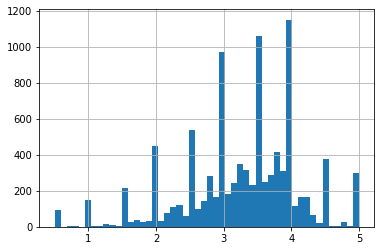

In [8]:
# histogram of average ratings

import matplotlib.pyplot as plt
%matplotlib inline
rated['rating'].hist(bins=50)

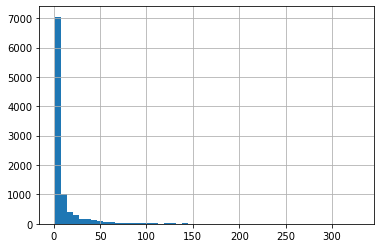

In [9]:
# histogram of number of ratings

rated['number_of_ratings'].hist(bins=50)

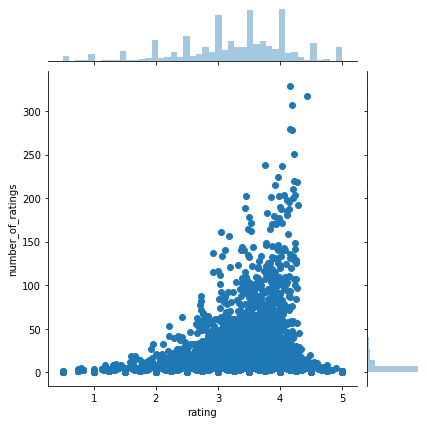

In [10]:
# numbers vs. means

import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=rated)

In [11]:
# rating by user for every movie matrix

movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# sorted by number of ratings

rated.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [13]:
# users rating for the movie "Forrest Gump"

forrest_gump_ratings = movie_matrix['Forrest Gump (1994)']
forrest_gump_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [14]:
# pointing movies similar to "Forrest Gump"

movies_like_forrest_gump = movie_matrix.corrwith(forrest_gump_ratings)
corr_forrest_gump = pd.DataFrame(movies_like_forrest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [15]:
# sorted

corr_forrest_gump.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [16]:
# joining the number of ratings

corr_forrest_gump = corr_forrest_gump.join(rated['number_of_ratings'])
corr_forrest_gump.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [17]:
# sorted by correlation with more than 50 ratings registered

corr_forrest_gump[corr_forrest_gump['number_of_ratings']>50].sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


In [24]:
# creating global score

c = rated['rating'].mean()
c

3.262388395325744

In [25]:
# required minimum number of ratings

m = rated['number_of_ratings'].quantile(0.90)
m

27.0

In [36]:
# identify qualified movies

q_movies = rated.copy().loc[rated['number_of_ratings'] >= m]
print(q_movies.shape)
print(rated.shape)
q_movies.head()

(976, 2)
(9719, 2)


,rating,number_of_ratings
title,,
(500) Days of Summer (2009),3.666667,42
10 Things I Hate About You (1999),3.527778,54
101 Dalmatians (1996),3.074468,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),3.431818,44
12 Angry Men (1957),4.149123,57


In [31]:
# function that computes the weighted rating of each movie

def weighted_rating(x, m=m, c=c):
    v = x['number_of_ratings']
    R = x['rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

In [37]:
# define & compute new score column on qualified movies
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

# Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

# Print the top 15 movies
q_movies[['number_of_ratings', 'rating', 'score']].head(15)

,number_of_ratings,rating,score
title,,,
"Shawshank Redemption, The (1994)",317,4.429022,4.337455
"Godfather, The (1972)",192,4.289062,4.162486
Fight Club (1999),218,4.272936,4.161569
Star Wars: Episode IV - A New Hope (1977),251,4.231076,4.136995
"Usual Suspects, The (1995)",204,4.237745,4.123742
Pulp Fiction (1994),307,4.197068,4.121510
Schindler's List (1993),220,4.225000,4.119775
"Matrix, The (1999)",278,4.192446,4.110113
Star Wars: Episode V - The Empire Strikes Back (1980),211,4.215640,4.107498
